In [1]:
import pandas as pd
import numpy as np
import re
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [2]:
# Definisikan kategori Sport, Religion, dan Technology
categories = [
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'alt.atheism',
    'soc.religion.christian'
]

# Ambil dataset dari 20newsgroups
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,"\nThey tried their best not to show it, believ..."
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...
2,\n[deletia- and so on]\n\nI seem to have been ...
3,"Excuse the sheer newbieness of this post, but ..."
4,==============================================...
...,...
3446,"\n Or, with no dictionary available, they cou..."
3447,\n\nSorry to disappoint you but the Red Wings ...
3448,\n: Can anyone tell me where to find a MPEG vi...
3449,\n


Pada bagian ini, menginisiasi kategori yang akan dipakai. Selanjutnya membuat dataset berdasarkan kategori yang sebelumnya sudah ditetapkan, dan disini diambil hanya bagian train. Terakhir, membuat dataframe dengan kolom corpus dengan dataset yang sudah dibuat sebelumnya.

In [3]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbersx
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. filter out words longer than 15 characters
        tokens = [w for w in tokens if len(w) <= 20]
        # 4. join back together
        text = " ".join(tokens)
    text = text.lower().strip()
    return text
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords = True))
df

,corpus,cleaned
0,"\nThey tried their best not to show it, believ...",tried best show believe im surprised couldnt f...
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...,stankiewicz doubt koufax one two jewish hofs h...
2,\n[deletia- and so on]\n\nI seem to have been ...,deletia seem rather unclear asking please show...
3,"Excuse the sheer newbieness of this post, but ...",excuse sheer newbieness post looking decent pa...
4,==============================================...,
...,...,...
3446,"\n Or, with no dictionary available, they cou...",dictionary available could gain first hand kno...
3447,\n\nSorry to disappoint you but the Red Wings ...,sorry disappoint red wings earned victoryeasil...
3448,\n: Can anyone tell me where to find a MPEG vi...,anyone tell find mpeg viewer either dos window...
3449,\n,


Pada bagian ini, membuat fungsi terlebih dahulu untuk mempreprocessing kolom korpus, yang didalamnya berisi menghapus link meyimpan huruf menghapus stopword dan menghapus kata yang hurufnya lebih dari 20 dan terakhir menurunkan huruf kapital. Selanjutnya mengimplementasikan fungsi yang dibuat tadi ke kolom korpus dan menyimpannya dalam kolom cleaned. 

In [4]:
# Menggunakan Count Vectorizer untuk mengubah teks dokumen menjadi vektor fitur
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned'])

# Ubah array X menjadi matriks sparse CSR
X_sparse = csr_matrix(X)
from sklearn.preprocessing import normalize
X_normalized_sparse = normalize(X_sparse, norm='l2')
# Melakukan K-Means Clustering dengan Euclidean Distance
n_clusters = 3  # Ganti dengan jumlah cluster yang sesuai
kmeans_euclidean = KMeans(n_clusters=n_clusters, random_state=0).fit(X_normalized_sparse)
labels_euclidean = kmeans_euclidean.labels_

print('Hasil K-Means Clustering dengan Euclidean Distance :', labels_euclidean)

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil K-Means Clustering dengan Euclidean Distance : [2 2 1 ... 0 2 2]


In [5]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
pca = PCA(n_components=2, random_state=42) 
pca_vecs = pca.fit_transform(X_normalized_sparse.toarray()) 
x0_eu = pca_vecs[:, 0]
x1_eu = pca_vecs[:, 1]
df['x0_eu'] = x0_eu
df['x1_eu'] = x1_eu
df['euclidean'] = labels_euclidean
print(df)

                                                 corpus   
0     \nThey tried their best not to show it, believ...  \
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...   
2     \n[deletia- and so on]\n\nI seem to have been ...   
3     Excuse the sheer newbieness of this post, but ...   
4     ==============================================...   
...                                                 ...   
3446  \n  Or, with no dictionary available, they cou...   
3447  \n\nSorry to disappoint you but the Red Wings ...   
3448  \n: Can anyone tell me where to find a MPEG vi...   
3449                                                 \n   
3450  \nHey Valentine, I don't see Boston with any w...   

                                                cleaned     x0_eu     x1_eu   
0     tried best show believe im surprised couldnt f...  0.007049  0.001474  \
1     stankiewicz doubt koufax one two jewish hofs h... -0.003413  0.071615   
2     deletia seem rather unclear asking please show..

In [7]:
def get_top_keywords_eu(n_terms):
    df_eu = pd.DataFrame(X_normalized_sparse.todense())
    df_eu["euclidean"] = labels_euclidean
    df_grouped = df_eu.groupby('euclidean').mean()
    terms = vectorizer.get_feature_names_out()
    for i, r in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords_eu(10)
cluster_map = {0: "technology", 1: "religion", 2: "sport"}
df['euclidean'] = df['euclidean'].map(cluster_map)


Cluster 0
using,like,im,program,files,use,file,know,thanks,windows

Cluster 1
bible,like,say,know,believe,think,jesus,dont,people,god

Cluster 2
know,im,time,year,good,team,dont,game,like,think


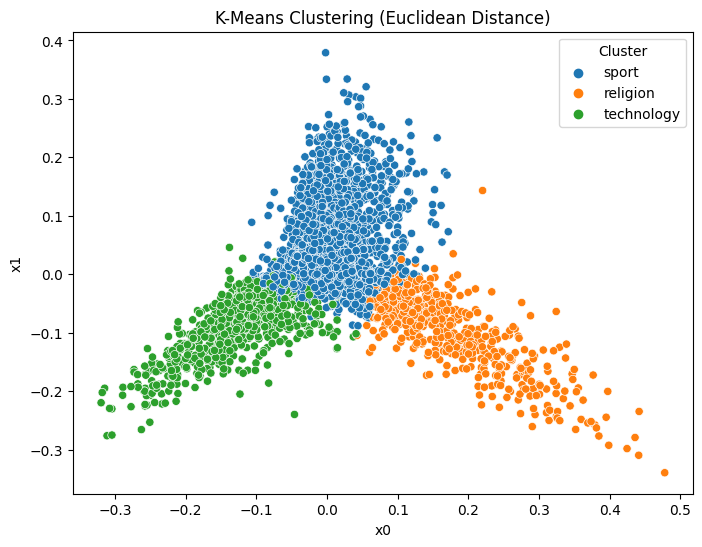

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['x0_eu'], y=df['x1_eu'], hue='euclidean')
plt.title('K-Means Clustering (Euclidean Distance)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [9]:
# Menghitung Cosine Similarity
cosine_similarities = cosine_similarity(X_normalized_sparse)

# Mengisi diagonal dengan nol pada matriks jarak Cosine Similarity
np.fill_diagonal(cosine_similarities, 0)

# Melakukan K-Means Clustering dengan Cosine Similarity
kmeans_cosine = KMeans(n_clusters=n_clusters, init='k-means++').fit(cosine_similarities)
labels_cosine = kmeans_cosine.labels_

print('Hasil K-Means Clustering dengan Cosine Similarity :', labels_cosine)

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil K-Means Clustering dengan Cosine Similarity : [2 2 0 ... 1 2 0]


In [10]:
pca = PCA(n_components=2, random_state=42) 
pca_vecs = pca.fit_transform(cosine_similarities) 
x0_cs = pca_vecs[:, 0]
x1_cs = pca_vecs[:, 1]
df['x0_cs'] = x0_cs
df['x1_cs'] = x1_cs
df['cosine'] = labels_cosine
print(df)

                                                 corpus   
0     \nThey tried their best not to show it, believ...  \
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...   
2     \n[deletia- and so on]\n\nI seem to have been ...   
3     Excuse the sheer newbieness of this post, but ...   
4     ==============================================...   
...                                                 ...   
3446  \n  Or, with no dictionary available, they cou...   
3447  \n\nSorry to disappoint you but the Red Wings ...   
3448  \n: Can anyone tell me where to find a MPEG vi...   
3449                                                 \n   
3450  \nHey Valentine, I don't see Boston with any w...   

                                                cleaned     x0_eu     x1_eu   
0     tried best show believe im surprised couldnt f...  0.007049  0.001474  \
1     stankiewicz doubt koufax one two jewish hofs h... -0.003413  0.071615   
2     deletia seem rather unclear asking please show..

In [11]:
def get_top_keywords_cs(n_terms):
    df_cs = pd.DataFrame(cosine_similarities)
    df_cs["cosine"] = labels_cosine
    df_grouped = df_cs.groupby('cosine').mean()
    terms = vectorizer.get_feature_names_out()
    for i, r in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords_cs(30)
cluster_map = {0: "technology", 1: "sport", 2: "Religion"}
df['cosine'] = df['cosine'].map(cluster_map)


Cluster 0
archival,bernieecrmuozau,achived,anticipating,bjorkloven,blackhawks,acme,acm,betrayer,austria,atwoods,accumulation,bosgreenwell,acker,answered,alaikum,bojsenithiliddthdk,borrowed,anoint,ayxyxdf,ajf,bitter,alan,arrognace,academia,adds,baby,abolition,annihilation,believable

Cluster 1
asterixinescnpt,anymore,allrookie,affordable,assimilated,balked,audibly,begotten,backtobacktoback,ashbee,atheistsagnostics,avs,bizarre,athletes,ability,amalgam,brash,alh,antisocietal,athomsonotagoacnz,atlgant,behaving,aside,alessandros,attached,assigning,bc,accessno,bernie,america

Cluster 2
baby,awright,annihilation,automatix,atomic,anticipating,abolition,albatross,bahavior,bcs,bo,bates,boyd,affiliate,bojsenithiliddthdk,alleviate,atlnixon,arrognace,assists,archives,americanization,bethesda,betrayer,apollo,born,analyst,arent,agrinoenkidumiccl,accountability,believable


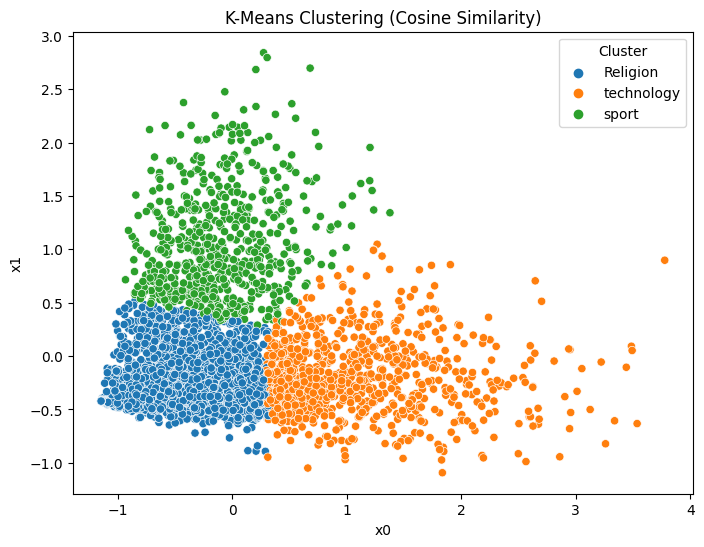

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['x0_cs'], y=df['x1_cs'], hue='cosine')
plt.title('K-Means Clustering (Cosine Similarity)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [13]:
# Menghitung DBI dan Silhouette Score
dbi_euclidean = davies_bouldin_score(X_normalized_sparse.toarray(), labels_euclidean)
dbi_cosine = davies_bouldin_score(cosine_similarities, labels_cosine)
silhouette_euclidean = silhouette_score(X_normalized_sparse.toarray(), labels_euclidean, metric='euclidean')
silhouette_cosine = silhouette_score(pairwise_distances(cosine_similarities, metric='cosine'), labels_cosine, metric='precomputed')

# Menampilkan hasil analisis
print("DBI (Euclidean Distance):", dbi_euclidean)
print("DBI (Cosine Similarity):", dbi_cosine)
print("Silhouette Score (Euclidean Distance):", silhouette_euclidean)
print("Silhouette Score (Cosine Similarity):", silhouette_cosine)

# Analisis hasil berdasarkan DBI dan Silhouette Score
if dbi_euclidean < dbi_cosine:
    print("Metode Euclidean Distance lebih baik berdasarkan DBI.")
else:
    print("Metode Cosine Similarity lebih baik berdasarkan DBI.")

if silhouette_euclidean > silhouette_cosine:
    print("Metode Euclidean Distance lebih baik berdasarkan Silhouette Score.")
else:
    print("Metode Cosine Similarity lebih baik berdasarkan Silhouette Score.")

DBI (Euclidean Distance): 8.819862941576746
DBI (Cosine Similarity): 2.305339744213212
Silhouette Score (Euclidean Distance): 0.01207831942785828
Silhouette Score (Cosine Similarity): 0.030193984755760548
Metode Cosine Similarity lebih baik berdasarkan DBI.
Metode Cosine Similarity lebih baik berdasarkan Silhouette Score.
